In [2]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# Quick check
df.head()

,id,capture_date,doctor,procedure_category,form_date,admission_id,hospitalDesc,hospital_wardDesc,days_since_admission,length_of_stay,...,weight_loss_month_36.5,weight_loss_month_36_plus.5,recurrent_month_1.5,recurrent_month_3.5,recurrent_month_6.5,recurrent_month_12.5,recurrent_month_24.5,recurrent_month_36.5,recurrent_month_36_plus.5,complication
0,45207,2025-02-03 11:03:00,Dr T Smit,SADI,2025-02-03,6166,Zuid Afrikaans,Ward C,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,824,2021-03-05 16:13:00,Dr T Smit,Sleeve,2020-02-05,0,NaN,Unknown,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,37253,2024-05-06 13:23:00,Dr T Smit,SADI,2024-05-06,4538,Zuid Afrikaans,Ward C,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,40073,2024-08-14 12:46:00,Dr T Smit,Sleeve,2024-08-14,5109,Zuid Afrikaans,Ward C,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1616,2021-04-12 09:42:00,Dr T Smit,SADI,2021-04-12,234,Zuid Afrikaans,Ward C,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
# Separate your target
target = 'complication'

# Drop target and ID to get feature columns
feature_cols = df.drop(columns=['id', target]).columns.tolist()

# Quick check of types and unique values
for col in feature_cols:
    unique_vals = df[col].dropna().unique()
    print(f"{col}: {df[col].dtype}, Unique values: {len(unique_vals)}")

capture_date: object, Unique values: 334
doctor: object, Unique values: 2
procedure_category: object, Unique values: 5
form_date: object, Unique values: 214
admission_id: int64, Unique values: 328
hospitalDesc: object, Unique values: 4
hospital_wardDesc: object, Unique values: 12
days_since_admission: int64, Unique values: 20
length_of_stay: int64, Unique values: 11
gender: object, Unique values: 2
age: int64, Unique values: 48
weight: float64, Unique values: 126
height: int64, Unique values: 42
bmi: float64, Unique values: 295
ibw: float64, Unique values: 254
ebw: float64, Unique values: 325
surgical_hist_cnt: int64, Unique values: 1
family_hist_cnt: int64, Unique values: 5
chronic_meds_cnt: int64, Unique values: 11
cm_count: int64, Unique values: 14
morbidity: int64, Unique values: 1
CM_AIDS: int64, Unique values: 4
CM_ALCOHOL: int64, Unique values: 1
CM_ANEMDEF: int64, Unique values: 2
CM_ARTH: int64, Unique values: 3
CM_BLDLOSS: int64, Unique values: 1
CM_CHF: int64, Unique values:

In [21]:
core_X_data=df[['gender', 'age', 'height', 'weight', 'bmi', 'ibw', 'ebw', 'surgical_hist_cnt', 'family_hist_cnt', 'chronic_meds_cnt']].copy()

In [22]:
core_X_data['gender'] = core_X_data['gender'].replace({'Female': 1, 'Male': 0})

/var/folders/r3/k2y0mmbd07g_j4j09shbg4ch0000gn/T/ipykernel_62156/2131768249.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  core_X_data['gender'] = core_X_data['gender'].replace({'Female': 1, 'Male': 0})


In [23]:
for col in core_X_data.columns:
    print(f"{col}: dtype={core_X_data[col].dtype}, unique values={core_X_data[col].nunique()}")

gender: dtype=int64, unique values=2
age: dtype=int64, unique values=48
height: dtype=int64, unique values=42
weight: dtype=float64, unique values=126
bmi: dtype=float64, unique values=295
ibw: dtype=float64, unique values=254
ebw: dtype=float64, unique values=325
surgical_hist_cnt: dtype=int64, unique values=1
family_hist_cnt: dtype=int64, unique values=5
chronic_meds_cnt: dtype=int64, unique values=11


In [24]:
core_X_data.head()

,gender,age,height,weight,bmi,ibw,ebw,surgical_hist_cnt,family_hist_cnt,chronic_meds_cnt
0,1,50,154,146.0,61.56,55.99,90.01,0,0,0
1,1,52,168,96.0,34.00,70.00,26.00,0,0,0
2,1,23,163,143.0,53.82,58.04,84.96,0,0,0
3,1,23,176,120.0,38.74,52.59,67.41,0,0,0
4,1,57,162,112.0,42.68,65.35,46.65,0,0,7


In [25]:
for col in core_X_data.columns:
    print(f"{col}: dtype={core_X_data[col].dtype}, bad entries: {core_X_data[col].apply(lambda x: isinstance(x, str)).sum()}")

gender: dtype=int64, bad entries: 0
age: dtype=int64, bad entries: 0
height: dtype=int64, bad entries: 0
weight: dtype=float64, bad entries: 0
bmi: dtype=float64, bad entries: 0
ibw: dtype=float64, bad entries: 0
ebw: dtype=float64, bad entries: 0
surgical_hist_cnt: dtype=int64, bad entries: 0
family_hist_cnt: dtype=int64, bad entries: 0
chronic_meds_cnt: dtype=int64, bad entries: 0


In [29]:
df['complication'].dtype

dtype('int64')

In [26]:
for col in core_X_data.columns:
    print(f"\n{col} — Unique values ({core_X_data[col].nunique()}):")
    print(core_X_data[col].unique())


gender — Unique values (2):
[1 0]

age — Unique values (48):
[50 52 23 57 21 18 59 72 69 70 68 64 61 63 62 60 58 56 32 55 54 53 48 47
 51 49 46 45 44 41 43 42 40 38 39 28 29 37 36 33 30 34 35 31 27 24 25 26]

height — Unique values (42):
[154 168 163 176 162 160 166 169 173 183 175 161 171 181 159 165 158 153
 157 192 178 164 172 188 185 155 174 167 170 182 184 189 180 152 179 156
 149 177 195 150 194 187]

weight — Unique values (126):
[146.   96.  143.  120.  112.  115.  114.  131.  163.  106.3 160.   99.2
 130.  144.8 170.  117.  165.  155.  107.  124.  162.  184.  140.  169.
  95.  180.  135.  100.  110.   83.  150.  133.  121.  176.  167.  145.
 139.  113.4  93.  164.   98.  201.  104.  132.  143.7 215.  107.3 118.
 153.  240.  148.5 105.  109.  127.  125.  144.  154.  148.  158.  138.
 142.  108.  136.4 128.  126.  113.  141.  198.   85.  116.  122.  195.
 102.  156.  136.  197.   92.  143.5 207.   97.4 123.   94.  103.  208.
  99.   98.3  88.  129.   91.3  97.  106.5  90.  185.

In [28]:
core_X_data.head()

,gender,age,height,weight,bmi,ibw,ebw,surgical_hist_cnt,family_hist_cnt,chronic_meds_cnt
0,1,50,154,146.0,61.56,55.99,90.01,0,0,0
1,1,52,168,96.0,34.00,70.00,26.00,0,0,0
2,1,23,163,143.0,53.82,58.04,84.96,0,0,0
3,1,23,176,120.0,38.74,52.59,67.41,0,0,0
4,1,57,162,112.0,42.68,65.35,46.65,0,0,7


In [30]:
from scipy.stats import pointbiserialr


target = df['complication']

# Calculate point-biserial correlation for each feature
correlations = {}

for col in core_X_data.columns:
    corr, _ = pointbiserialr(core_X_data[col], target)
    correlations[col] = corr

# Sort by absolute value of correlation
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Display
print("Correlation with 'complication':")
for col, val in sorted_corr:
    print(f"{col}: {val:.3f}")

Correlation with 'complication':
bmi: 0.143
surgical_hist_cnt: nan
chronic_meds_cnt: 0.155
ebw: 0.134
weight: 0.116
gender: 0.056
family_hist_cnt: 0.046
height: -0.042
ibw: 0.033
age: 0.017


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


<Axes: >

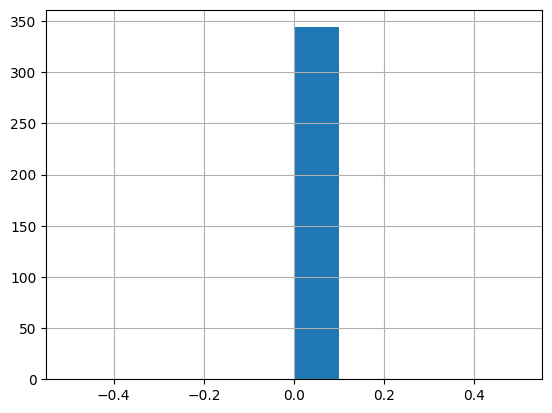

In [33]:
df['surgical_hist_cnt'].hist()

In [34]:
# Check all unique values in the 'surgical_hist_cnt' column of the dataframe
unique_surgical_hist_cnt_values = df['surgical_hist_cnt'].unique()
print("Unique values in 'surgical_hist_cnt':", unique_surgical_hist_cnt_values)

Unique values in 'surgical_hist_cnt': [0]


Strong Predictors (>0.1 correlation):
chronic_meds_cnt (0.155) - This is your strongest predictor, which makes perfect clinical sense:

More chronic medications = more comorbidities = higher surgical risk
Patients on multiple medications often have complex medical conditions

bmi (0.143) - Expected strong predictor:

Higher BMI = more surgical complexity and complications
Super-morbidly obese patients (BMI >50) have significantly higher risks

ebw (0.134) - Excess Body Weight correlates with BMI:

More excess weight = more tissue to manage surgically
Higher metabolic stress

weight (0.116) - Raw weight also matters:

Heavier patients = more technical surgical challenges
Often correlates with larger body habitus

Weaker but Notable Predictors:
gender (0.056) - Modest correlation suggests:

Possible sex-based differences in complication rates
Could be related to body composition or comorbidity patterns

family_hist_cnt (0.046) - Genetic predisposition factor:

Family history may indicate inherited conditions affecting healing

Interesting Observations:
surgical_hist_cnt: nan - This is problematic and needs investigation:

Could indicate missing data or data quality issues
Previous surgeries are typically important risk factors

height (-0.042) - Weak negative correlation:

Taller patients might have slightly lower complication rates
Could be related to body proportions or surgical access

age (0.017) - Surprisingly weak correlation:

Age is usually a stronger predictor in surgery
Your dataset might have a narrow age range or other confounding factors

**LET'S INCLUDE CORMOBIDITY'S NOW**

In [36]:
core_X_data.drop(['surgical_hist_cnt'], axis=1, inplace=True)

In [37]:
core_X_data.head()


,gender,age,height,weight,bmi,ibw,ebw,family_hist_cnt,chronic_meds_cnt
0,1,50,154,146.0,61.56,55.99,90.01,0,0
1,1,52,168,96.0,34.00,70.00,26.00,0,0
2,1,23,163,143.0,53.82,58.04,84.96,0,0
3,1,23,176,120.0,38.74,52.59,67.41,0,0
4,1,57,162,112.0,42.68,65.35,46.65,0,7


In [38]:
cm_cols= [col for col in df.columns if col.startswith('CM_')]

core_X_data_with_CM = core_X_data.join(df[cm_cols].fillna(0).astype(int))

In [39]:
core_X_data_with_CM.head()

,gender,age,height,weight,bmi,ibw,ebw,family_hist_cnt,chronic_meds_cnt,CM_AIDS,...,CM_RENLFAIL.5,CM_SMOKE.5,CM_TUMOR.5,CM_ULCER.5,CM_VALVE.5,CM_WGHTLOSS.5,CM_APNEA.5,CM_CHOLSTRL.5,CM_OSTARTH.5,CM_HPLD.5
0,1,50,154,146.0,61.56,55.99,90.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,52,168,96.0,34.00,70.00,26.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,23,163,143.0,53.82,58.04,84.96,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,23,176,120.0,38.74,52.59,67.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,57,162,112.0,42.68,65.35,46.65,0,7,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Describe the columns in cm_cols within the core_X_data_with_CM dataframe
cm_cols_description = core_X_data_with_CM[cm_cols].describe()
cm_cols_description

,CM_AIDS,CM_ALCOHOL,CM_ANEMDEF,CM_ARTH,CM_BLDLOSS,CM_CHF,CM_CHRNLUNG,CM_COAG,CM_DEPRESS,CM_DM,...,CM_RENLFAIL.5,CM_SMOKE.5,CM_TUMOR.5,CM_ULCER.5,CM_VALVE.5,CM_WGHTLOSS.5,CM_APNEA.5,CM_CHOLSTRL.5,CM_OSTARTH.5,CM_HPLD.5
count,344.000000,344.0,344.000000,344.000000,344.0,344.000000,344.0,344.0,344.000000,344.000000,...,344.0,344.000000,344.0,344.0,344.0,344.0,344.000000,344.000000,344.000000,344.000000
mean,0.023256,0.0,0.002907,0.008721,0.0,0.005814,0.0,0.0,0.075581,0.537791,...,0.0,0.008721,0.0,0.0,0.0,0.0,0.011628,0.005814,0.052326,0.008721
std,0.227894,0.0,0.053916,0.120420,0.0,0.107833,0.0,0.0,0.374224,0.559854,...,0.0,0.120420,0.0,0.0,0.0,0.0,0.131746,0.076138,0.354308,0.093113
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,3.000000,0.0,1.000000,2.000000,0.0,2.000000,0.0,0.0,3.000000,2.000000,...,0.0,2.000000,0.0,0.0,0.0,0.0,2.000000,1.000000,4.000000,1.000000


In [43]:
# Find CM_ columns that are constant (same value across all rows)
constant_cm_cols = [col for col in cm_cols if core_X_data_with_CM[col].nunique() == 1]

# Print them
print("CM_ columns with constant values:")
for col in constant_cm_cols:
    print(f"{col}: unique value = {core_X_data_with_CM[col].unique()[0]}")

# Drop them from the dataset
core_X_data_with_CM = core_X_data_with_CM.drop(columns=constant_cm_cols)

CM_ columns with constant values:
CM_ALCOHOL: unique value = 0
CM_BLDLOSS: unique value = 0
CM_CHRNLUNG: unique value = 0
CM_COAG: unique value = 0
CM_DRUG: unique value = 0
CM_LYMPH: unique value = 0
CM_LYTES: unique value = 0
CM_METS: unique value = 0
CM_NEURO: unique value = 0
CM_PARA: unique value = 0
CM_PERIVASC: unique value = 0
CM_PULMCIRC: unique value = 0
CM_RENLFAIL: unique value = 0
CM_TUMOR: unique value = 0
CM_ULCER: unique value = 0
CM_VALVE: unique value = 0
CM_WGHTLOSS: unique value = 0
CM_ALCOHOL.1: unique value = 0
CM_BLDLOSS.1: unique value = 0
CM_CHF.1: unique value = 0
CM_CHRNLUNG.1: unique value = 0
CM_COAG.1: unique value = 0
CM_DRUG.1: unique value = 0
CM_LYMPH.1: unique value = 0
CM_LYTES.1: unique value = 0
CM_METS.1: unique value = 0
CM_NEURO.1: unique value = 0
CM_PARA.1: unique value = 0
CM_PERIVASC.1: unique value = 0
CM_PSYCH.1: unique value = 0
CM_PULMCIRC.1: unique value = 0
CM_RENLFAIL.1: unique value = 0
CM_TUMOR.1: unique value = 0
CM_ULCER.1: unique

In [44]:
core_X_data_with_CM.head()

,gender,age,height,weight,bmi,ibw,ebw,family_hist_cnt,chronic_meds_cnt,CM_AIDS,...,CM_DM.5,CM_DMCX.5,CM_HTN_C.5,CM_LIVER.5,CM_OBESE.5,CM_SMOKE.5,CM_APNEA.5,CM_CHOLSTRL.5,CM_OSTARTH.5,CM_HPLD.5
0,1,50,154,146.0,61.56,55.99,90.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,52,168,96.0,34.00,70.00,26.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,23,163,143.0,53.82,58.04,84.96,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,23,176,120.0,38.74,52.59,67.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,57,162,112.0,42.68,65.35,46.65,0,7,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
core_X_data_with_CM.describe()


,gender,age,height,weight,bmi,ibw,ebw,family_hist_cnt,chronic_meds_cnt,CM_AIDS,...,CM_DM.5,CM_DMCX.5,CM_HTN_C.5,CM_LIVER.5,CM_OBESE.5,CM_SMOKE.5,CM_APNEA.5,CM_CHOLSTRL.5,CM_OSTARTH.5,CM_HPLD.5
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.00000,344.000000,344.000000,344.000000,...,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.851744,42.537791,167.229651,131.089244,46.950058,60.052413,71.03689,0.133721,1.020349,0.023256,...,0.023256,0.005814,0.055233,0.029070,0.159884,0.008721,0.011628,0.005814,0.052326,0.008721
std,0.355871,10.231078,8.536128,28.003746,9.527095,13.726545,20.86812,0.523079,2.098769,0.227894,...,0.240347,0.076138,0.366015,0.199922,0.704435,0.120420,0.131746,0.076138,0.354308,0.093113
min,0.000000,18.000000,149.000000,73.000000,29.050000,27.230000,16.65000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,36.000000,161.750000,112.000000,40.570000,48.460000,59.10250,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,42.000000,167.000000,127.000000,45.740000,59.820000,70.09000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,173.000000,146.250000,51.342500,70.070000,83.34750,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,72.000000,195.000000,240.000000,101.730000,111.680000,172.21000,4.000000,12.000000,3.000000,...,4.000000,1.000000,3.000000,2.000000,5.000000,2.000000,2.000000,1.000000,4.000000,1.000000


In [47]:
# Display information about the 'CM_AIDS' column
cm_aids_info = core_X_data_with_CM['CM_AIDS'].describe()
print("Information about 'CM_AIDS' column:")
print(cm_aids_info)

Information about 'CM_AIDS' column:
count    344.000000
mean       0.023256
std        0.227894
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: CM_AIDS, dtype: float64


In [45]:
from scipy.stats import pointbiserialr


target = df['complication']

# Calculate point-biserial correlation for each feature
correlations = {}

for col in core_X_data_with_CM.columns:
    corr, _ = pointbiserialr(core_X_data_with_CM[col], target)
    correlations[col] = corr

# Sort by absolute value of correlation
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Display
print("Correlation with 'complication':")
for col, val in sorted_corr:
    print(f"{col}: {val:.3f}")

Correlation with 'complication':
CM_AIDS.5: 0.163
chronic_meds_cnt: 0.155
CM_OBESE.5: 0.146
bmi: 0.143
ebw: 0.134
CM_CHOLSTRL.1: 0.132
CM_DMCX.1: 0.120
weight: 0.116
CM_APNEA.3: -0.105
CM_DMCX.5: 0.103
CM_CHOLSTRL.5: 0.103
CM_HPLD: -0.094
CM_OSTARTH.5: 0.089
CM_OBESE: 0.077
CM_DM: -0.075
CM_HPLD.5: 0.074
CM_OSTARTH.4: -0.069
CM_APNEA: -0.068
CM_LIVER.3: -0.067
CM_DEPRESS: -0.067
CM_OBESE.2: -0.067
CM_HPLD.4: -0.066
CM_LIVER.2: -0.059
CM_DMCX.3: 0.059
CM_DM.1: 0.058
CM_DEPRESS.3: -0.057
CM_OSTARTH.3: -0.057
CM_OBESE.1: 0.057
gender: 0.056
CM_HTN_C.1: 0.054
CM_DEPRESS.1: -0.054
CM_OBESE.3: -0.054
CM_HPLD.3: -0.052
CM_LIVER: -0.050
CM_LIVER.5: -0.048
family_hist_cnt: 0.046
CM_OSTARTH.1: 0.043
height: -0.042
CM_DEPRESS.4: -0.042
CM_DEPRESS.2: -0.042
CM_OSTARTH: -0.040
CM_HYPOTHY: -0.038
CM_HYPOTHY.1: -0.038
CM_CHOLSTRL.3: 0.038
CM_CHOLSTRL: -0.038
CM_DMCX.2: 0.037
CM_CHOLSTRL.2: 0.037
CM_HTN_C.4: -0.036
CM_SMOKE: -0.036
CM_CHOLSTRL.4: -0.036
CM_DM.3: 0.036
CM_HYPOTHY.3: -0.034
CM_AIDS: -0.